# Bose-Einstein Condensate: 3D condensate in a comoving frame

In this tutorial, we will want to take the step into 3D. This is not to different from the 2D systems.  We start by setting the potential to a gaussian and initialise the wave function by relaxing the Thomas-Fermi ground state.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

### task 1. Initialise a BoseEinsteinCondensate in 3 dimensions with resolution 64x64x64. Sett gamma = 0 and dt =0.1


### task 2. set the potential to a gaussian placed at the centre with size = 2 and strenght = 4. Initialise the
# wave function using the thomas-fermi groundstate and relax the system for 100 time steps. Plot the result



We now want to set the dissipative frame. 

In [2]:
### task 3. set a dissipative frame with wx=wy=wz = 25. Plot gamma






[0.00157973 0.44118845 0.88079716]


Now the system will be evolved in the comoving frame. We sett the stirer velocity to 0.8. This will produce vortex rings that are removed by the dissipative frame.

In [5]:
### adding some noise to the wave function 
bec.psi += (0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)+ 0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)*(1j))*np.abs(bec.psi)**2
bec.psi_f = np.fft.fftn(bec.psi)

### task 4. evolve the system in the comoving frame using vel_x =0.8 until bec.t = 100. track the vortices and
# plot the result (This might take a few minutes)

    

ax=bec.plot_field(np.abs(bec.psi)**2)

plt.show()

[5.86850174e-04 5.65474978e-01 1.13036311e+00]


In [ ]:
### extra task 1. Initialise a 3D bec (remember to find ground state) with one, two or more
### vortex rings using the function
### conf_insert_vortex_ring(self, position=None, radius=None, normal_vector=[0, 0, 1]) 
### play around with their sizes, initial position and normal vector

In [ ]:
### extra task 2. Make a time dependent stirring potential in 3D. Vary the stirring velocity, stirring radius 
### and size of the stirrer.
### Try making the stirrer move in different patterns than circular (ask Vidar about salsa steps)


# Solutions

Relaxing the BoseEinsteinCondensate...


evolving the dGPE: 100%|██████████████████████| 100/100 [00:01<00:00, 67.91it/s]


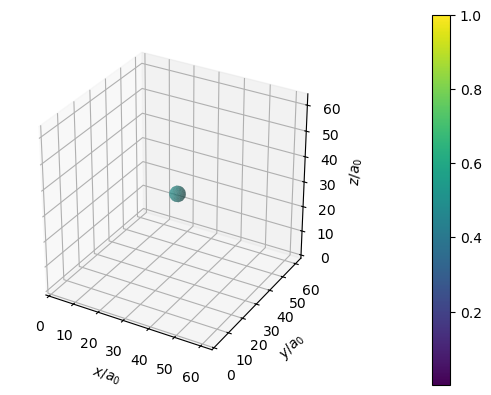

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import comfit as cf


bec = cf.BoseEinsteinCondensate(3,xRes=64,yRes=64,zRes=64,gamma=0,dt=0.05)

pot= bec.calc_gaussian_stirring_potential(2,4,[bec.xmid,bec.ymid,bec.zmid])

bec.conf_external_potential(pot, additive=False)

bec.conf_initial_condition_Thomas_Fermi()
bec.evolve_relax(100)

bec.plot_field(np.abs(bec.psi)**2)
plt.show()

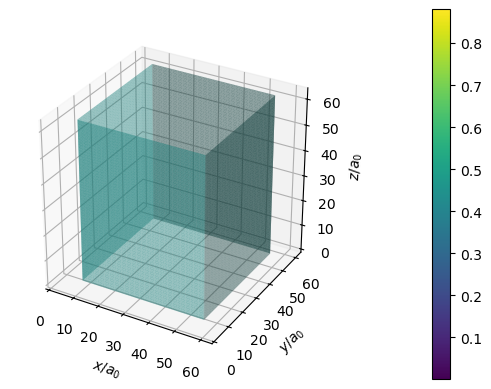

In [2]:
bec.conf_dissipative_frame(wx=25,wy=25,wz=25)

bec.plot_field(bec.gamma)
plt.show()

evolving the dGPE in the comoving frame: 0it [00:00, ?it/s]


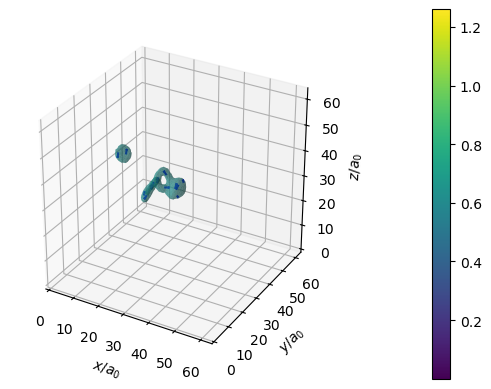

In [9]:
## add noise to break symmetry
bec.psi += (0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)+ 0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)*(1j))*np.abs(bec.psi)**2
bec.psi_f = np.fft.fftn(bec.psi)
vel_x = 0.8

t_max = 300

timesteps = int(t_max/bec.dt)


bec.evolve_comoving_dGPE(timesteps,vel_x,method='ETD4RK')


nodes =  bec.calc_vortex_nodes()    

fig,ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False)
bec.plot_vortex_nodes(nodes,ax)
plt.show()

